# Flow analysis:  OD-2017 research

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [48]:
# reading OD dataset
od_path = '../data/ODs/OD_2017.csv'
df = pd.read_csv(od_path)

In [49]:
# selecting required columns
trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN']] 
trips.columns

Index(['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA', 'MODOPRIN'], dtype='object')

In [50]:
trips.head(5) # how trips looks 

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN
0,1.0,36.0,3.0,36.0,22.132647,16.0
1,3.0,36.0,1.0,36.0,22.132647,16.0
2,1.0,36.0,82.0,36.0,18.882487,1.0
3,82.0,36.0,84.0,36.0,18.882487,1.0
4,84.0,36.0,1.0,36.0,18.882487,12.0


In [51]:
# grouping MODOPRIN
grouped_trips = trips.groupby('MODOPRIN')['FE_VIA'].sum().reset_index()
grouped_trips.tail(2)

,MODOPRIN,FE_VIA
15,16.0,1.334988e+07
16,17.0,1.117166e+05


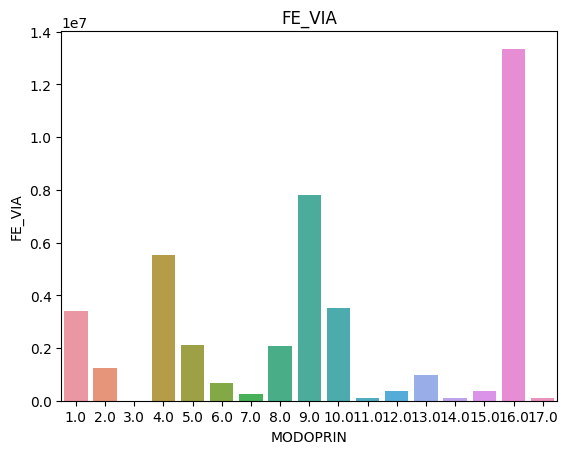

In [52]:
# entender fator de expansão

# FE_VIA mean by MODOPRIN
sns.barplot(x='MODOPRIN', y='FE_VIA', data=grouped_trips)
plt.title('FE_VIA')
plt.show()

### Representativade dos meios de transporte

In [ ]:
# Mapping dictionary
t_modes_map = {
    1: 'Metrô',
    2: 'Trem',
    3: 'Monotrilho',
    4: 'O/MO/P do município de São Paulo', # ônibus/micro-ônibus/perua
    5: 'O/MO/P de outros municípios',
    6: 'O/MO/P metropolitano',
    7: 'Transporte Fretado',
    8: 'Transporte Escolar',
    9: 'Dirigindo Automóvel',
    10: 'Passageiro de Automóvel',
    11: 'Táxi Convencional',
    12: 'Táxi não Convencional',
    13: 'Dirigindo Moto',
    14: 'Passageiro de Moto',
    15: 'Bicicleta',
    16: 'A Pé',
    17: 'Outros'
}

C:\Users\55119\AppData\Local\Temp\ipykernel_16412\665950147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['MODOPRIN_NOME'] = trips['MODOPRIN'].map(t_modes_map)


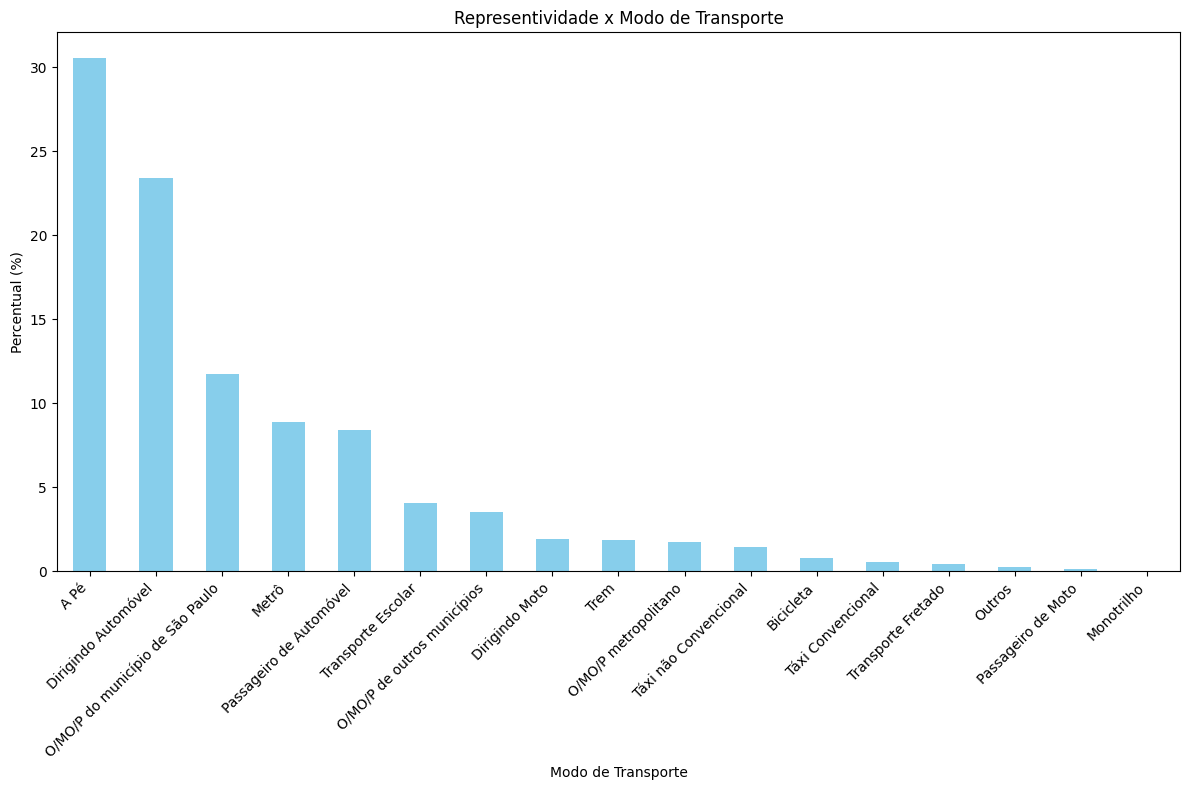

In [87]:
# Passo 1: Substituir os valores numéricos por nomes usando o dicionário
trips['MODOPRIN_NOME'] = trips['MODOPRIN'].map(t_modes_map)

# Passo 2: Calcular a contagem e a representatividade percentual
modoprin_counts = trips['MODOPRIN_NOME'].value_counts()
modoprin_percent = (modoprin_counts / modoprin_counts.sum()) * 100

# Passo 3: Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
modoprin_percent.plot(kind='bar', color='skyblue')
plt.title('Representividade x Modo de Transporte')
plt.xlabel('Modo de Transporte')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')  # Ajusta a rotação dos rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para que os rótulos não se sobreponham
plt.show()

In [53]:
# count transport mode
transport_modes = trips['MODOPRIN'].value_counts().reset_index()
rows_sum = transport_modes['count'].sum()
print(f"Rows sum = {rows_sum:,}")

Rows sum = 157,992


In [54]:
# transport mode representation
transport_modes['Representation'] = (((transport_modes['count'] / rows_sum)*100).round(2)).apply(lambda x: f'{x:.2f}%')
transport_modes

,MODOPRIN,count,Representation
0,16.0,48285,30.56%
1,9.0,37005,23.42%
2,4.0,18612,11.78%
3,1.0,14077,8.91%
4,10.0,13308,8.42%
5,8.0,6463,4.09%
6,5.0,5565,3.52%
7,13.0,3045,1.93%
8,2.0,2926,1.85%
9,6.0,2795,1.77%


In [55]:
# Modos de transporte com mais viagens
most_trips_transp_modes = transport_modes.head(5)
most_trips_transp_modes

,MODOPRIN,count,Representation
0,16.0,48285,30.56%
1,9.0,37005,23.42%
2,4.0,18612,11.78%
3,1.0,14077,8.91%
4,10.0,13308,8.42%


### Análise censitária
Mini glossário

Coluna 50 - SEXO:
- 1: Masculino;
- 2: Feminino.

In [59]:
gendered_trips = df[['ZONA_O', 'MUNI_O', 'ZONA_D', 'MUNI_D', 'FE_VIA','MODOPRIN', 'SEXO']] 
gendered_trips.head(3)

,ZONA_O,MUNI_O,ZONA_D,MUNI_D,FE_VIA,MODOPRIN,SEXO
0,1.0,36.0,3.0,36.0,22.132647,16.0,2
1,3.0,36.0,1.0,36.0,22.132647,16.0,2
2,1.0,36.0,82.0,36.0,18.882487,1.0,2


In [60]:
# Counting gender frequency
gender_counter = (gendered_trips['SEXO'].value_counts(normalize=True)*100).round(2)
gender_counter.index = gender_counter.index.map({1: 'Masculino', 2: 'Feminino'}) # mapping values to corresponding labels
print(gender_counter)

SEXO
Feminino     51.29
Masculino    48.71
Name: proportion, dtype: float64


In [88]:
g_distr_trip = gendered_trips
g_distr_trip['MODOPRIN'] = g_distr_trip['MODOPRIN'].replace(t_modes_map)

C:\Users\55119\AppData\Local\Temp\ipykernel_16412\1321302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_distr_trip['MODOPRIN'] = g_distr_trip['MODOPRIN'].replace(t_modes_map)


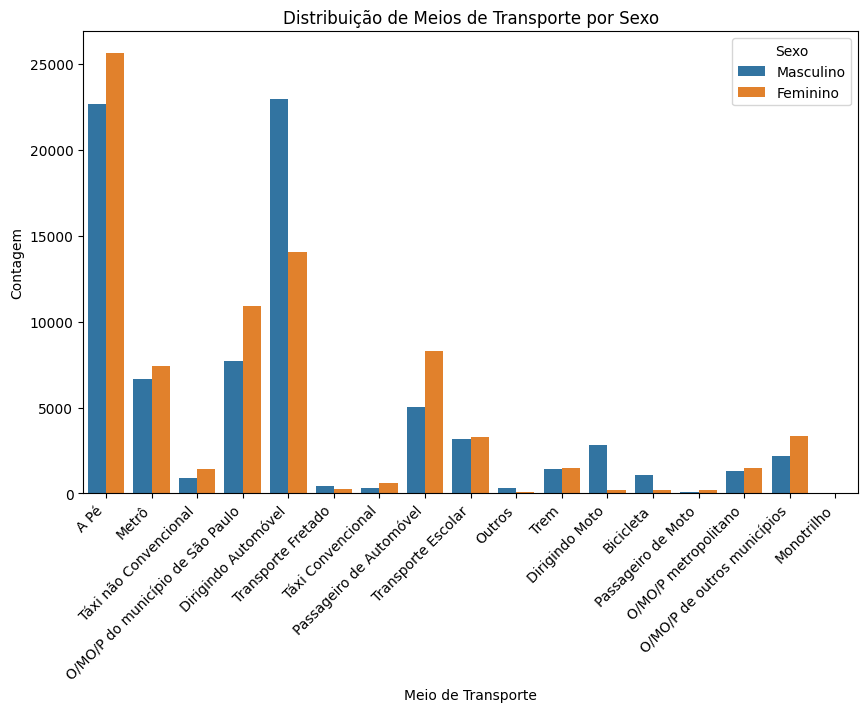

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MODOPRIN', hue='SEXO', data=g_distr_trip)
plt.title('Distribuição de Meios de Transporte por Sexo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=45, ha='right') 
plt.show()

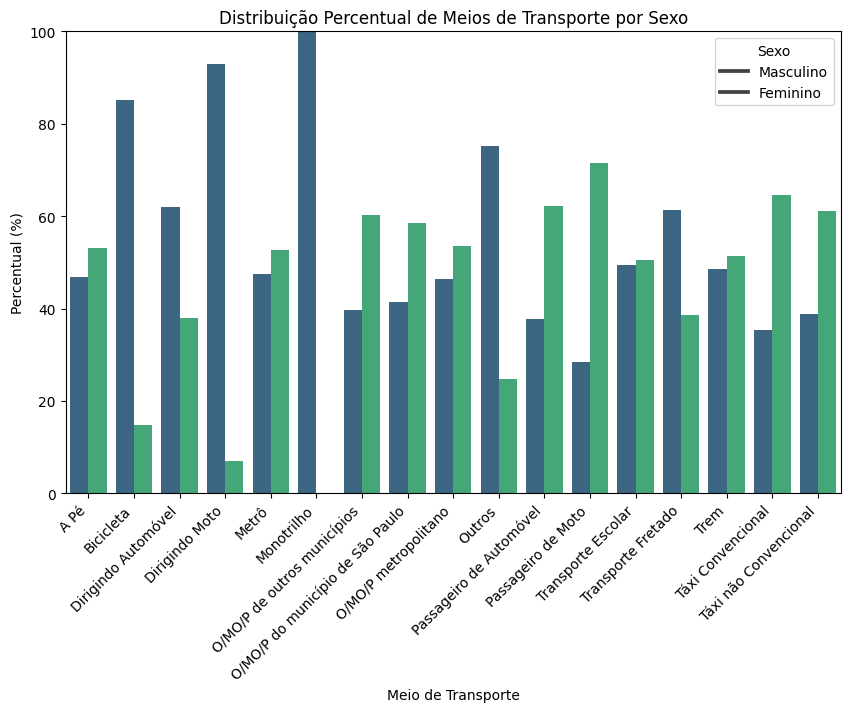

In [92]:
# Calcular as contagens e percentuais
count_data = g_distr_trip.groupby(['MODOPRIN', 'SEXO']).size().reset_index(name='Count')
total_counts = count_data.groupby('MODOPRIN')['Count'].transform('sum')
count_data['Percentual'] = count_data['Count'] / total_counts * 100

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='MODOPRIN', y='Percentual', hue='SEXO', data=count_data, palette='viridis')

# Personalizar o gráfico
plt.title('Distribuição Percentual de Meios de Transporte por Sexo')
plt.xlabel('Meio de Transporte')
plt.ylabel('Percentual (%)')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Define o intervalo do eixo y para 0 a 100%
plt.show()

In [64]:
pedestrian_gendered_trips = gendered_trips[gendered_trips['MODOPRIN']==16] # filter pedestrian trips

In [65]:
ped_gender_counter = (pedestrian_gendered_trips['SEXO'].value_counts(normalize=True)*100).round(2)
ped_gender_counter.index = ped_gender_counter.index.map({1: 'Masculino', 2: 'Feminino'}) # mapping values to corresponding labels
print(ped_gender_counter)

Series([], Name: proportion, dtype: float64)
